# Explore here

In [1]:
import pandas as pd 

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
total_data=total_data.drop_duplicates().reset_index(drop=True)

total_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature selection

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

x=total_data.drop("Outcome", axis =1)
y=total_data["Outcome"]

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2 , random_state= 42)

selection_model= SelectKBest(k=7)
selection_model.fit(x_train,y_train)

selected_columns = x_train.columns[selection_model.get_support()]
x_train_sel=pd.DataFrame(selection_model.transform(x_train),columns= selected_columns)
x_test_sel=pd.DataFrame(selection_model.transform(x_test), columns= selected_columns)

x_train_sel.head()



,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [4]:
x_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [5]:
x_train_sel["Outcome"] = y_train.values
x_test_sel["Outcome"] = y_test.values

x_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
x_test_sel.to_csv("../data/processed/clean_test.csv", index = False)


Random forest model

In [6]:
train_data=pd.read_csv("../data/processed/clean_train.csv")
test_data=pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


In [7]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=60, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

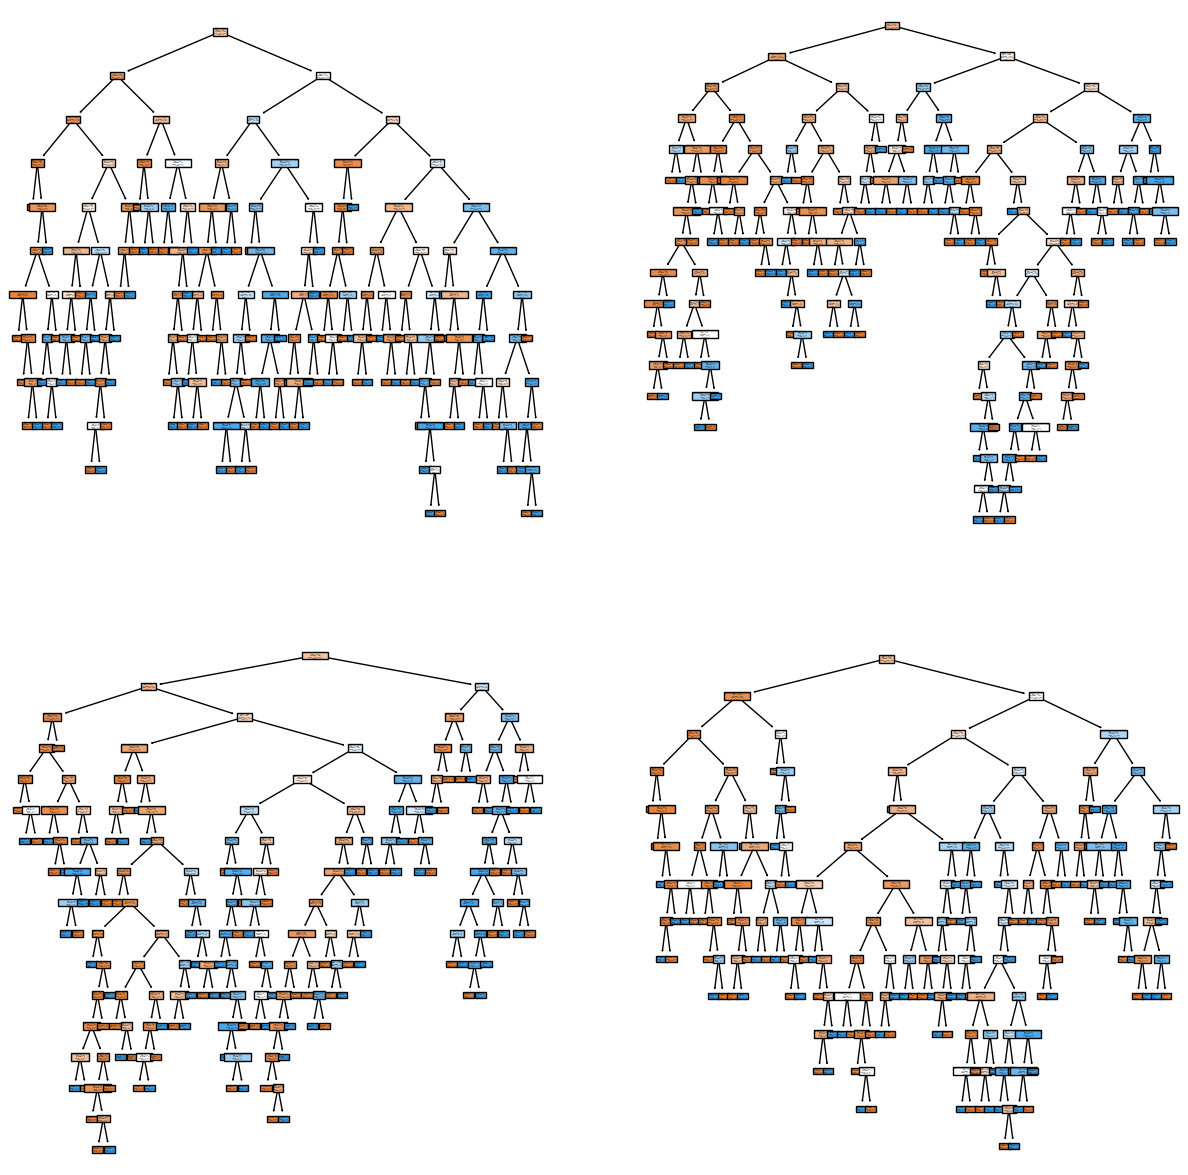

In [8]:
import matplotlib.pyplot as plt 
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax=axis[0,0],feature_names=list(x_train.columns), class_names=["0","1","2"], filled=True)
tree.plot_tree(model.estimators_[1], ax=axis[0,1],feature_names=list(x_train.columns), class_names=["0","1","2"], filled=True)
tree.plot_tree(model.estimators_[2], ax=axis[1,0],feature_names=list(x_train.columns), class_names=["0","1","2"], filled=True)
tree.plot_tree(model.estimators_[3], ax=axis[1,1],feature_names=list(x_train.columns), class_names=["0","1","2"], filled=True)

plt.show()




In [9]:
y_pred=model.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)



0.7142857142857143

In [11]:
from pickle import dump

dump(model, open("Random_Forest_Classifier_default_42.sav", "wb"))